# Imports

In [68]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

from functools import partial
from collections import Counter


# Functions 

In [31]:
def plot_3d_clusters(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    cmap=plt.cm.get_cmap("Accent_r")
    
    for label,dataset in data.groupby("label"):
        x = []
        y = []
        z = []
        for data_point in dataset.values:
            x.append(data_point[0])
            y.append(data_point[1])
            z.append(data_point[2])
        ax.scatter(x, y, z, marker='o',label="cluster "+str(label))


    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.legend()
    
    return fig

def euclidian_distance(X, Y):
    return sum([(x-y)**2 for x,y in zip(X,Y)])**0.5

def get_classe_by_centroid(obj,centroids_dataframe):
    partial_euclidian_distance = partial(euclidian_distance, obj)
    euclidian_distance_centroids = list(map(partial_euclidian_distance, centroids_dataframe.drop(["classe"], axis = 1).values))
    return centroids_dataframe["classe"].values[np.argmin(euclidian_distance_centroids)]


# Load dataset and set global variables

In [15]:
classes_dataset = pd.read_csv("class.csv")
zoo_dataset = pd.read_csv("zoo.csv", index_col = 0)
zoo_dataset_labels = zoo_dataset["class_type"]
zoo_dataset = zoo_dataset.drop(["class_type"], axis = 1)
zoo_dataset.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
animal_name,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


In [4]:
zoo_dataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


In [16]:
zoo_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, aardvark to wren
Data columns (total 16 columns):
hair        101 non-null int64
feathers    101 non-null int64
eggs        101 non-null int64
milk        101 non-null int64
airborne    101 non-null int64
aquatic     101 non-null int64
predator    101 non-null int64
toothed     101 non-null int64
backbone    101 non-null int64
breathes    101 non-null int64
venomous    101 non-null int64
fins        101 non-null int64
legs        101 non-null int64
tail        101 non-null int64
domestic    101 non-null int64
catsize     101 non-null int64
dtypes: int64(16)
memory usage: 13.0+ KB


# Pre-process

In [17]:
normalized_zoo_data = MinMaxScaler( copy = False).fit_transform(zoo_dataset)
normalized_zoo_dataset = pd.DataFrame(data = normalized_zoo_data, columns = zoo_dataset.columns)

c:\users\jadson\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [18]:
normalized_zoo_dataset.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,1.0,1.0,1.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,1.0,0.0


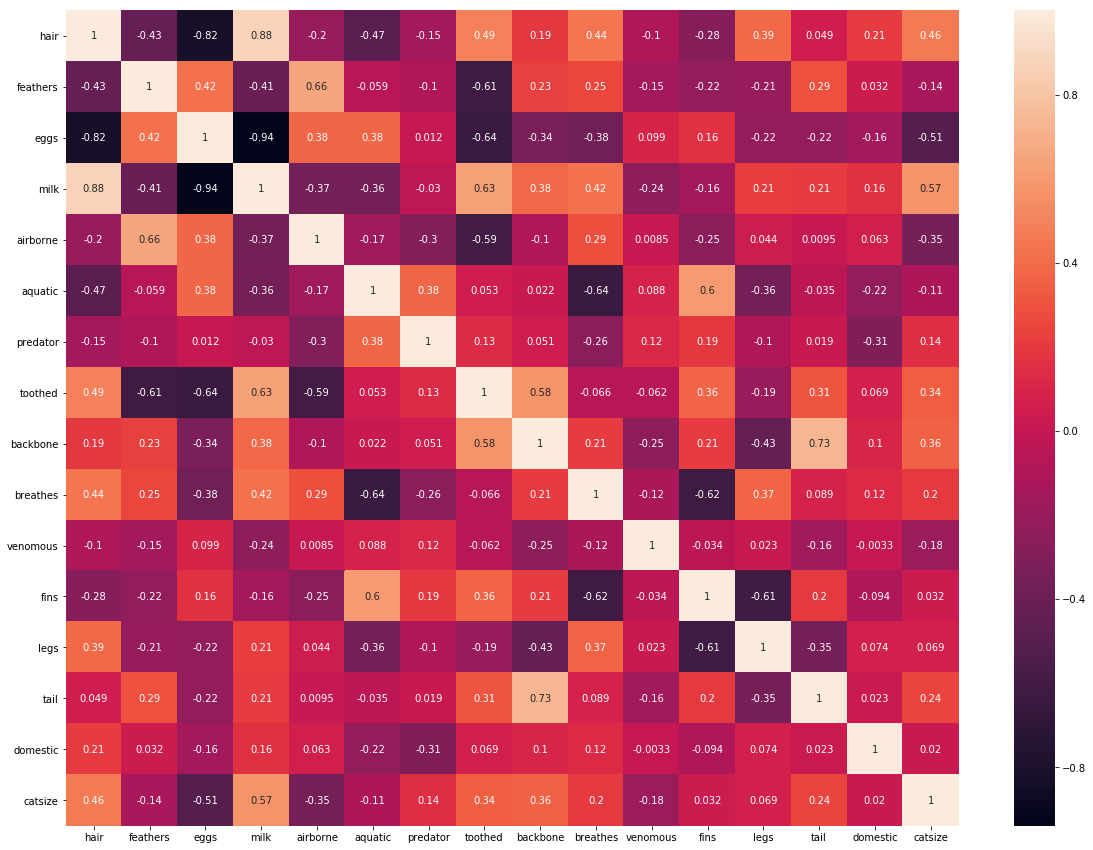

In [19]:
plt.subplots(figsize=(20,15))
snb.heatmap(data = normalized_zoo_dataset.corr(), annot = True)

# Kmeans

In [86]:
kmeans_model = KMeans(n_clusters = 7)
kmeans_model.fit(normalized_zoo_dataset)

centroids_dataset = pd.DataFrame(data = kmeans_model.cluster_centers_, columns = zoo_dataset.columns).round(4)
centroids_dataset_nolabels = centroids_dataset.drop("classe", axis = 1)
centroids_dataset

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,classe
0,0.904762,0.000000,0.047619,1.0,0.000000,0.285714,0.952381,0.952381,1.000000,1.000000,0.000000,0.190476,0.392857,0.761905,0.095238,1.000000,Reptile
1,0.000000,0.952381,1.000000,0.0,0.761905,0.285714,0.428571,0.000000,1.000000,1.000000,0.000000,0.000000,0.261905,1.000000,0.142857,0.333333,Bird
2,1.000000,0.000000,0.000000,1.0,0.100000,0.000000,0.100000,1.000000,1.000000,1.000000,0.000000,0.000000,0.450000,0.950000,0.300000,0.550000,Mammal
3,0.000000,0.000000,0.777778,0.0,0.000000,0.555556,0.888889,0.888889,0.888889,0.888889,0.444444,0.000000,0.388889,0.666667,0.000000,0.000000,Amphibian
4,0.400000,0.000000,1.000000,0.0,0.600000,0.000000,0.100000,0.000000,0.000000,1.000000,0.200000,0.000000,0.600000,0.000000,0.100000,0.000000,Bug
5,0.000000,0.000000,1.000000,0.0,0.000000,0.857143,1.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.517857,0.000000,0.000000,0.142857,Invertebrate
6,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.692308,1.000000,1.000000,0.000000,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692,Fish


# Train random forest to find centroids class (only to speed up clusters identification)

In [51]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(normalized_zoo_dataset, zoo_dataset_labels)
random_forest_model.feature_importances_

c:\users\jadson\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.05895553, 0.15087414, 0.17206233, 0.1118018 , 0.0359    ,
       0.0559124 , 0.00696879, 0.04367987, 0.06837083, 0.06976777,
       0.02353198, 0.04612253, 0.08465644, 0.04134756, 0.00029601,
       0.02975202])

# Create centroids and similarity dataframes

In [87]:
get_class_type = lambda class_number : classes_dataset[classes_dataset["Class_Number"] == class_number]["Class_Type"].values[0]
centroids_dataset["classe"] = [get_class_type(label) for label in random_forest_model.predict(centroids_dataset_nolabels)]
centroids_dataset

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,classe
0,0.904762,0.000000,0.047619,1.0,0.000000,0.285714,0.952381,0.952381,1.000000,1.000000,0.000000,0.190476,0.392857,0.761905,0.095238,1.000000,Reptile
1,0.000000,0.952381,1.000000,0.0,0.761905,0.285714,0.428571,0.000000,1.000000,1.000000,0.000000,0.000000,0.261905,1.000000,0.142857,0.333333,Bird
2,1.000000,0.000000,0.000000,1.0,0.100000,0.000000,0.100000,1.000000,1.000000,1.000000,0.000000,0.000000,0.450000,0.950000,0.300000,0.550000,Mammal
3,0.000000,0.000000,0.777778,0.0,0.000000,0.555556,0.888889,0.888889,0.888889,0.888889,0.444444,0.000000,0.388889,0.666667,0.000000,0.000000,Amphibian
4,0.400000,0.000000,1.000000,0.0,0.600000,0.000000,0.100000,0.000000,0.000000,1.000000,0.200000,0.000000,0.600000,0.000000,0.100000,0.000000,Bug
5,0.000000,0.000000,1.000000,0.0,0.000000,0.857143,1.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.517857,0.000000,0.000000,0.142857,Invertebrate
6,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.692308,1.000000,1.000000,0.000000,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692,Fish


# PCA and groups plot

In [88]:
pca_model = PCA(n_components = 3)
pca_components_data = pca_model.fit_transform(zoo_dataset)
pca_wine_dataset = pd.DataFrame(data = pca_components_data, columns = ["Component "+str(cont) for cont in range(pca_components_data.shape[1])])
pca_wine_dataset["label"] = list(map(lambda label : centroids_dataset["classe"][label],kmeans_model.labels_))
pca_wine_dataset.head()

,Component 0,Component 1,Component 2,label
0,1.351029,-1.058533,0.314103,Reptile
1,1.306634,-1.208344,-0.289405,Mammal
2,-3.131655,0.252200,0.929419,Fish
3,1.351029,-1.058533,0.314103,Reptile
4,1.277296,-1.225750,0.126239,Reptile


<IPython.core.display.Javascript object>


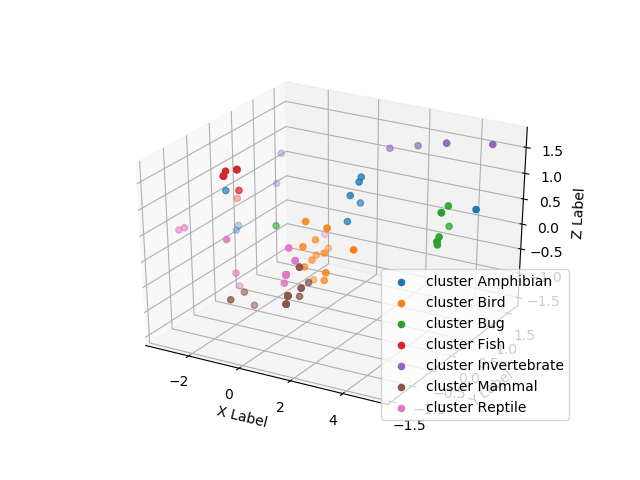

In [89]:
%matplotlib notebook
fig = plot_3d_clusters(pca_wine_dataset)

# Create clusters similarity table

In [90]:
data = []
for row in centroids_dataset.drop(["classe"], axis = 1).values:
    line = []
    for row2 in centroids_dataset.drop(["classe"], axis = 1).values:
        line.append(euclidian_distance(row, row2))
    
    data.append(line)

distance_dataframe = pd.DataFrame(data = data, columns = classes_dataset["Class_Type"].values)
distance_dataframe["Class_Type"] = classes_dataset["Class_Type"]
distance_dataframe.set_index("Class_Type", inplace = True)
distance_dataframe.to_csv("similarity_centroids_dataset.csv")
distance_dataframe

,Mammal,Bird,Reptile,Fish,Amphibian,Bug,Invertebrate
Class_Type,,,,,,,
Mammal,0.000000,2.439547,1.072914,1.925945,2.633769,2.712569,2.378577
Bird,2.439547,0.000000,2.375765,1.758613,1.884168,2.298521,2.268657
Reptile,1.072914,2.375765,0.000000,2.063251,2.432591,2.956006,2.584613
Fish,1.925945,1.758613,2.063251,0.000000,1.910950,1.759402,1.611950
Amphibian,2.633769,1.884168,2.432591,1.910950,0.000000,1.762134,2.709462
Bug,2.712569,2.298521,2.956006,1.759402,1.762134,0.000000,2.102545
Invertebrate,2.378577,2.268657,2.584613,1.611950,2.709462,2.102545,0.000000


# Predict animals class based on clusters

In [149]:
dataset = pd.read_csv("zoo.csv")
choiced_animals_index = np.random.choice(range(len(dataset)), 5, replace = False)
choiced_animals_dataframe = dataset.iloc[choiced_animals_index]
animal_names = choiced_animals_dataframe["animal_name"]
class_types = choiced_animals_dataframe["class_type"]
choiced_animals_dataframe = choiced_animals_dataframe.drop(["animal_name","class_type"], axis = 1)

In [153]:
animals_class = []
for animal in choiced_animals_dataframe.values:
    animals_class.append(get_classe_by_centroid(animal, centroids_dataset))

choiced_animals_dataframe["animal_name"] = animal_names
choiced_animals_dataframe["aninal_class"] = animals_class
choiced_animals_dataframe.to_csv("animals_classified.csv")

In [82]:
dict_classes = {cont:[] for cont in range(7)}
for instance,label in zip(normalized_zoo_dataset.values,kmeans_model.labels_):
    dict_classes[label].append(instance)

centroids = [np.mean(instances, 0) for instances in dict_classes.values()]
centroids_dataset = pd.DataFrame(data = centroids, columns = zoo_dataset.columns)

In [84]:
get_class_type = lambda class_number : classes_dataset[classes_dataset["Class_Number"] == class_number]["Class_Type"].values[0]
centroids_dataset["classe"] = [get_class_type(label) for label in random_forest_model.predict(centroids)]
centroids_dataset.set_value(0, "classe", "Reptile")

c:\users\jadson\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,classe
0,0.904762,0.000000,0.047619,1.0,0.000000,0.285714,0.952381,0.952381,1.000000,1.000000,0.000000,0.190476,0.392857,0.761905,0.095238,1.000000,Reptile
1,0.000000,0.952381,1.000000,0.0,0.761905,0.285714,0.428571,0.000000,1.000000,1.000000,0.000000,0.000000,0.261905,1.000000,0.142857,0.333333,Bird
2,1.000000,0.000000,0.000000,1.0,0.100000,0.000000,0.100000,1.000000,1.000000,1.000000,0.000000,0.000000,0.450000,0.950000,0.300000,0.550000,Mammal
3,0.000000,0.000000,0.777778,0.0,0.000000,0.555556,0.888889,0.888889,0.888889,0.888889,0.444444,0.000000,0.388889,0.666667,0.000000,0.000000,Amphibian
4,0.400000,0.000000,1.000000,0.0,0.600000,0.000000,0.100000,0.000000,0.000000,1.000000,0.200000,0.000000,0.600000,0.000000,0.100000,0.000000,Bug
5,0.000000,0.000000,1.000000,0.0,0.000000,0.857143,1.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.517857,0.000000,0.000000,0.142857,Invertebrate
6,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,0.692308,1.000000,1.000000,0.000000,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692,Fish
